# Predicting Housing Prices with regularized regression

#### 1.Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [67]:
data = pd.read_csv('data/Delhi_house_data.csv')
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [68]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [69]:
x = data.iloc[:,0:2]
x

,Area,BHK
0,800.0,3
1,750.0,2
2,950.0,2
3,600.0,2
4,650.0,2
...,...,...
1254,4118.0,4
1255,1050.0,3
1256,875.0,3
1257,990.0,2


In [70]:

y=data.iloc[:,6:7]
y

,Price
0,6500000
1,5000000
2,15500000
3,4200000
4,6200000
...,...
1254,55000000
1255,12500000
1256,17500000
1257,11500000


In [71]:
#spliting the dataset into train & test sets

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)


In [72]:
ytest.shape

(252, 1)

In [73]:
print('<--------- Base Regression --------------> \n')
from sklearn.linear_model import LinearRegression
base_reg = LinearRegression()
base_reg.fit(xtrain,ytrain)
base_pred = base_reg.predict(xtest)

#PERFORMANCE METRIC

from sklearn.metrics import r2_score
print("base Train score \t",base_reg.score(xtrain,ytrain))
print()
print("base Test score \t",base_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,base_pred))
print()
print('MAE \t',mean_absolute_error(ytest,base_pred))
print('MSE \t',mean_squared_error(ytest,base_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,base_pred)))

<--------- Base Regression --------------> 

base Train score 	 0.43650726581878574

base Test score 	 0.5737902953254839

R-Square 	 0.5737902953254839

MAE 	 10338503.435916116
MSE 	 206748822856445.66
RMSE 	 14378762.911198085


#### 2.Implement the Lasso regression Model

In [74]:
print('<------------ Lasso Regression model ----------->\n')
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(xtrain,ytrain)
lasso_pred = lasso_reg.predict(xtest)

print("Lasso Train score \t",lasso_reg.score(xtrain,ytrain))
print()
print("Lasso Test score \t",lasso_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,lasso_pred))

<------------ Lasso Regression model ----------->

Lasso Train score 	 0.43650726581878574

Lasso Test score 	 0.5737902954137406

R-Square 	 0.5737902954137406


#### 3.Evaluate the Lasso regression Model

In [75]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error
print('MAE \t',mean_absolute_error(ytest,lasso_pred))
print('MSE \t',mean_squared_error(ytest,lasso_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,lasso_pred)))

MAE 	 10338503.434044452
MSE 	 206748822813633.4
RMSE 	 14378762.909709353


#### 4.Implement the Ridge regression Model

In [58]:
print('<------------ Ridge Regression model ----------->\n')
ridge_reg = Ridge(alpha = 0.01)
ridge_reg.fit(xtrain,ytrain)
ridge_pred = ridge_reg.predict(xtest)

print("Lasso Train score:\t",ridge_reg.score(xtrain,ytrain))
print()
print("Lasso Test score:\t",ridge_reg.score(xtest,ytest))
print()
print("R-Square:\t",r2_score(ytest,ridge_pred))

<------------ Ridge Regression model ----------->

Lasso Train score:	 0.43650726579665156

Lasso Test score:	 0.5737912511518266

R-Square:	 0.5737912511518266


#### 5.Evaluate the Ridge regression Model

In [55]:
print('MAE \t',mean_absolute_error(ytest,ridge_pred))
print('MSE \t',mean_squared_error(ytest,ridge_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,ridge_pred)))

MAE 	 10338483.161486758
MSE 	 206748359197432.12
RMSE 	 14378746.788139505


## Diagnosing and Remedying Heteroscedasticity and Multicollinearity

In [3]:
data = pd.read_csv('data/employee_performance.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [4]:
data.isna().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [36]:
x=data[['Age','Projects Completed','Productivity (%)','Satisfaction Rate (%)','Feedback Score']]
y=data['Salary']

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
print('<--------- Base Regression --------------> \n')
from sklearn.linear_model import LinearRegression
base_reg = LinearRegression()
base_reg.fit(xtrain,ytrain)
base_pred = base_reg.predict(xtest)

#PERFORMANCE METRIC

from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error,explained_variance_score
print("base Train score \t",base_reg.score(xtrain,ytrain))
print()
print("base Test score \t",base_reg.score(xtest,ytest))
print()
print("R-Square \t",r2_score(ytest,base_pred))
print()
print('MAE \t',mean_absolute_error(ytest,base_pred))
print('MSE \t',mean_squared_error(ytest,base_pred))
print('RMSE \t',np.sqrt(mean_squared_error(ytest,base_pred)))

<--------- Base Regression --------------> 

base Train score 	 0.8388872878091449

base Test score 	 0.8063796938180696

R-Square 	 0.8063796938180696

MAE 	 8953.8979704157
MSE 	 118976861.28845832
RMSE 	 10907.651501971372


In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

residuals = ytest-base_pred
base_pred

array([ 66002.32998021,  54442.71543173,  88017.01213576,  80556.65467824,
        90484.82543237, 122997.42858278,  77178.50588242,  94554.72444636,
        78657.88774281,  69046.45588892,  42476.63534363,  38201.46846568,
        81205.88207066,  65641.29264945,  83043.90526898,  63857.27060821,
        50583.34848352,  44121.17321492,  40896.54751941,  87626.57643509,
        46420.16173338,  65281.44342124,  79562.45086109,  50462.41550513,
        63139.33513592,  83916.16977016,  54659.5732456 ,  60711.2038206 ,
        65325.90468912,  43088.52323675, 116928.42317031,  83259.97270287,
        98432.82588835,  75062.82197006, 129225.63149839,  86191.5607774 ,
        83725.73488246,  75038.55779624,  36597.26374279,  96132.1279597 ])

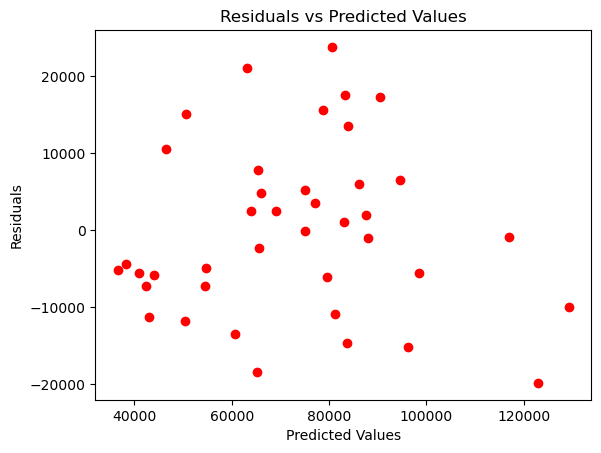

In [56]:
plt.scatter(base_pred,residuals,c='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [57]:
#Remedying Heteroscedasticity

weights = 1 / (residuals.var())
weights

8.196075027839576e-09